In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('FuelConsumption.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
df.shape

(1067, 13)

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


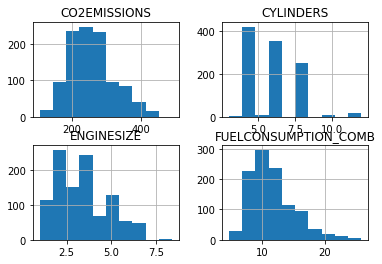

In [8]:
visualization= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
visualization.hist()
plt.show()

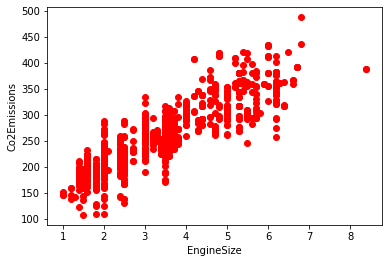

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel('EngineSize')
plt.ylabel('Co2Emissions')
plt.show()

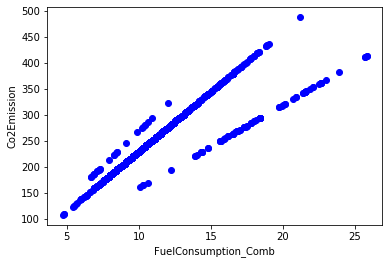

In [10]:

plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='blue')
plt.xlabel('FuelConsumption_Comb')
plt.ylabel('Co2Emission')
plt.show()

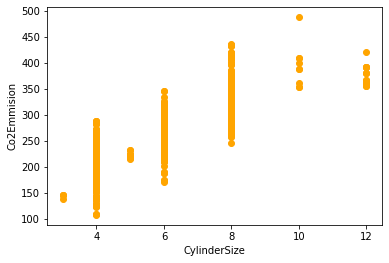

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='Orange')
plt.xlabel('CylinderSize')
plt.ylabel('Co2Emmision')
plt.show()

### Splitting the data in to training set and test set to reduce out-of-sample error. Ratio of split is 80/20. we can split the data by sklearn.model_selection.

In [16]:
split= np.random.randn(len(df))<0.8
train= cdf[split]
test= cdf[~split]

In [18]:
train.shape

(852, 4)

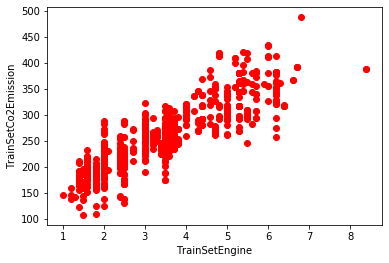

In [20]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.xlabel('TrainSetEngine')
plt.ylabel('TrainSetCo2Emission')
plt.show()

## Building model for linear Regression

In [21]:
from sklearn import linear_model
regressor= linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])
regressor.fit(train_x,train_y)   #Here we are going to build our model which will tell the best fit line which we can get from the data provided.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('coefficient: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)


coefficient:  [[38.80762968]]
Intercept:  [126.03825772]


Text(0, 0.5, 'Emission')

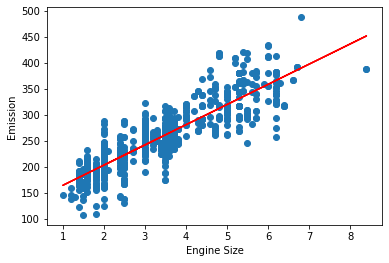

In [23]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.plot(train_x,regressor.coef_[0][0]*train_x+regressor.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

###  we have build the model.Now we will check our model on test set. The regression line will be same. But let see how our model predicts on the new data set i.e test set in this case.We have not given our test data to the model to train so it is new for the model.

Text(0, 0.5, 'Emission')

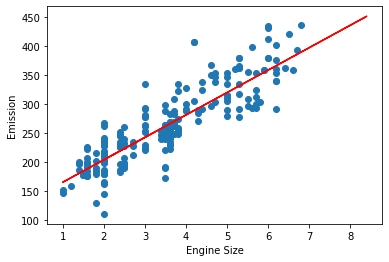

In [29]:
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS)
plt.plot(train_x,regressor.coef_[0][0]*train_x+regressor.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

In [30]:
from sklearn.metrics import r2_score
test_x= np.asanyarray(test[['ENGINESIZE']])
test_y= np.asanyarray(test[['CO2EMISSIONS']])
test_pred= regressor.predict(test_x)

In [31]:
print('Mean absolute error %.2f '% np.mean(np.absolute(test_pred-test_y)))

Mean absolute error 24.66 


In [32]:
print('Mean squared error %.2f'% np.mean((test_pred- test_y)**2))

Mean squared error 1050.97


In [33]:
print('R-squared value %.2f' %r2_score(test_pred,test_y))

R-squared value 0.67
